Two Bidimensional Classes as Four Gaussians.
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  3.447170429000039
Average MCC:  0.4598021197858672
Average error: 18.454099999999997
Average macro-F1: 0.7267783086910634
Average micro-F1: 0.8190000000000002
Average Accuracy:  81.5459
Standard Deviation:  15.412675958119667
Variance:  237.55058019


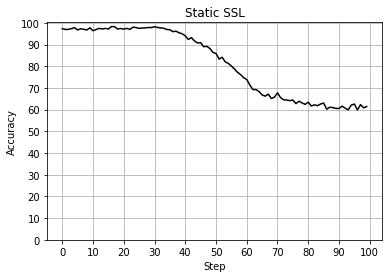

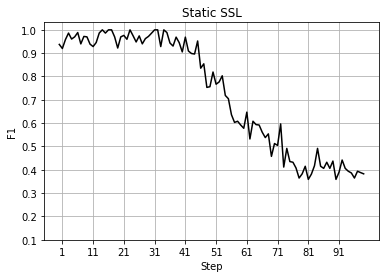

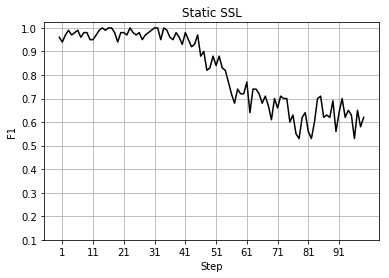




METHOD: Sliding lp as classifier
Execution time:  2.606588557000009
Average MCC:  0.8066928086797053
Average error: 8.952600000000004
Average macro-F1: 0.8919907476895973
Average micro-F1: 0.9109999999999998
Average Accuracy:  91.0474
Standard Deviation:  7.691938587898371
Variance:  59.16591923999999


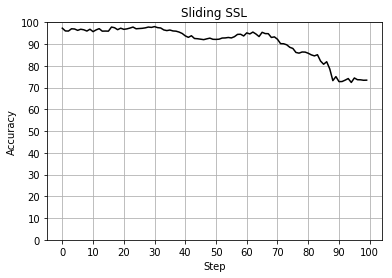

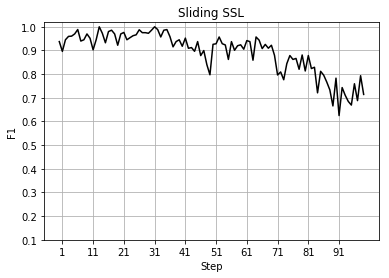

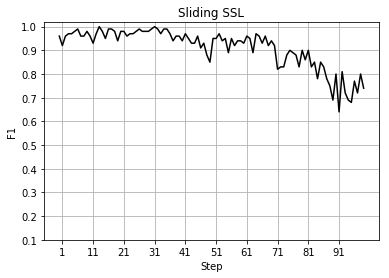




METHOD: Incremental lp as classifier
Execution time:  90.31270099599999
Average MCC:  0.46854989858285734
Average error: 17.827200000000005
Average macro-F1: 0.7305561735219284
Average micro-F1: 0.8245999999999999
Average Accuracy:  82.1728
Standard Deviation:  14.750543046274602
Variance:  217.57852016000004


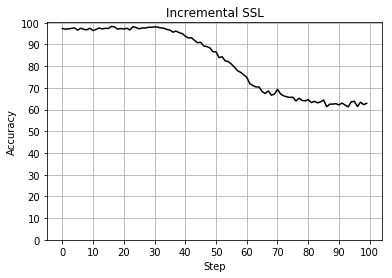

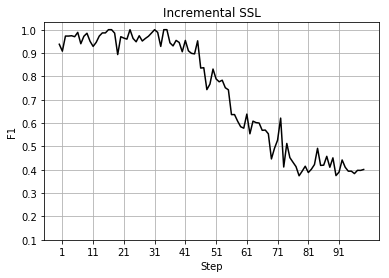

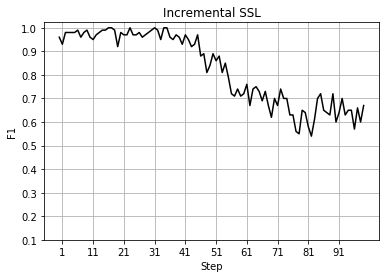




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  19.21920288299998
Average MCC:  0.8665342179597154
Average error: 5.0351
Average macro-F1: 0.9310491545291426
Average micro-F1: 0.9497999999999999
Average Accuracy:  94.9649
Standard Deviation:  2.2930043589143048
Variance:  5.257868990000002


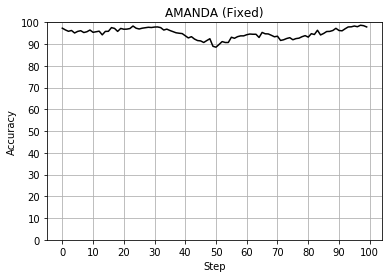

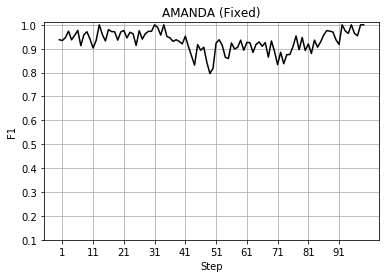

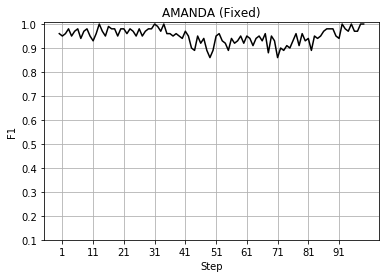




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.31 | Std keeping percentage=0.19
Execution time:  18.197981608999953
Average MCC:  0.6692432692777898
Average error: 17.269299999999987
Average macro-F1: 0.8040587651744147
Average micro-F1: 0.8266
Average Accuracy:  82.73070000000001
Standard Deviation:  10.541823585604153
Variance:  111.13004450999999


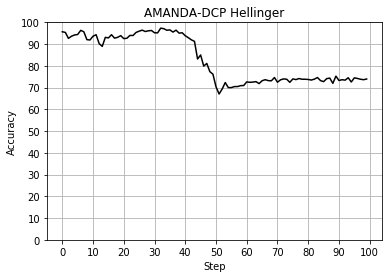

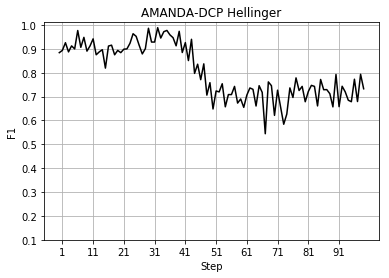

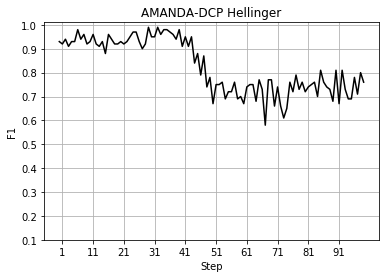




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.24 | Std keeping percentage=0.10
Execution time:  18.135440999000025
Average MCC:  0.5957031503612081
Average error: 21.576999999999998
Average macro-F1: 0.7631893578498427
Average micro-F1: 0.7851000000000004
Average Accuracy:  78.423
Standard Deviation:  14.296144620141472
Variance:  204.37975099999997


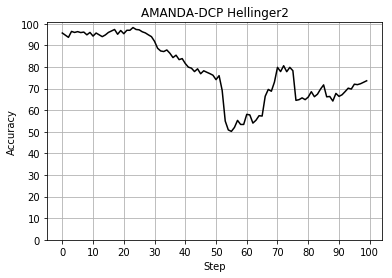

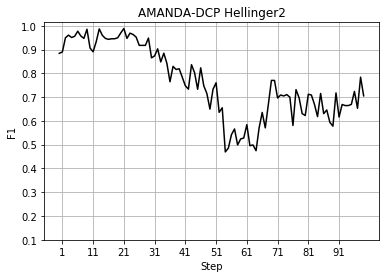

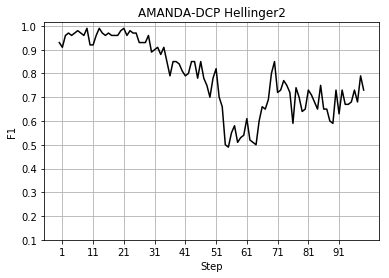




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.22 | Std keeping percentage=0.12
Execution time:  17.982680414000015
Average MCC:  0.6343671592823587
Average error: 19.190399999999997
Average macro-F1: 0.7790749806976096
Average micro-F1: 0.801
Average Accuracy:  80.8096
Standard Deviation:  9.639515954652493
Variance:  92.92026783999997


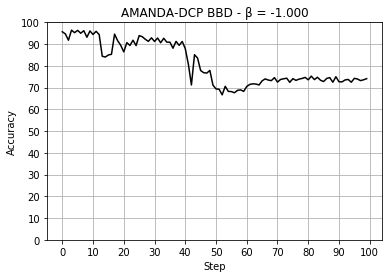

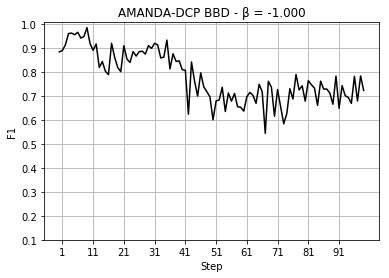

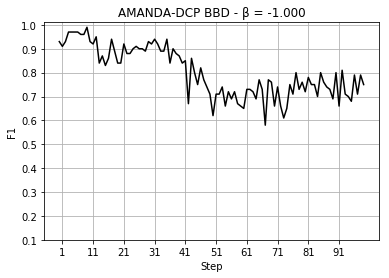




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.15 | Std keeping percentage=0.04
Execution time:  18.118094681000002
Average MCC:  0.6830174604103515
Average error: 17.476100000000002
Average macro-F1: 0.8074776596282915
Average micro-F1: 0.8251
Average Accuracy:  82.5239
Standard Deviation:  11.437468679301377
Variance:  130.81568979


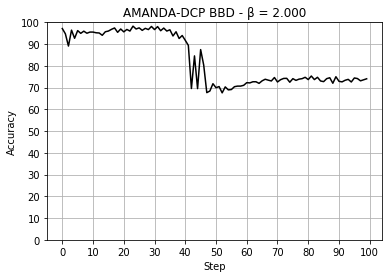

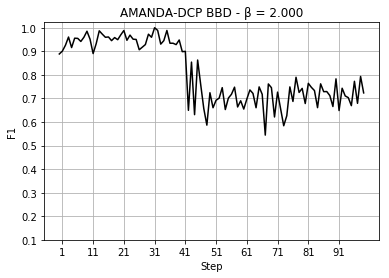

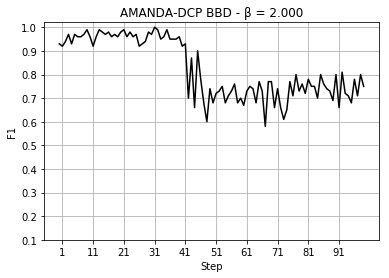




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 3.000 | Mean keeping percentage=0.16 | Std keeping percentage=0.06
Execution time:  18.541701794000005
Average MCC:  0.3875137702663436
Average error: 38.92710000000001
Average macro-F1: 0.5883752921126224
Average micro-F1: 0.6007
Average Accuracy:  61.07289999999999
Standard Deviation:  13.825128519836623
Variance:  191.13417858999998


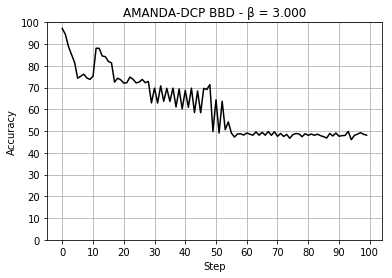

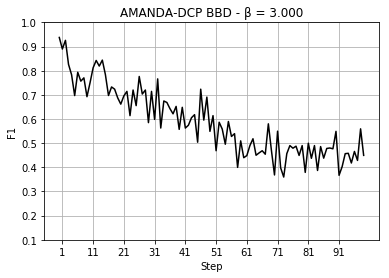

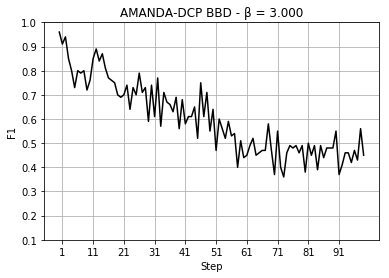




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.17 | Std keeping percentage=0.07
Execution time:  18.63819222899997
Average MCC:  0.6387802055048403
Average error: 19.772199999999998
Average macro-F1: 0.7804921967444138
Average micro-F1: 0.8009
Average Accuracy:  80.2278
Standard Deviation:  10.194968325600623
Variance:  103.93737915999998


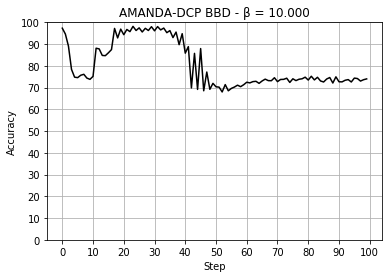

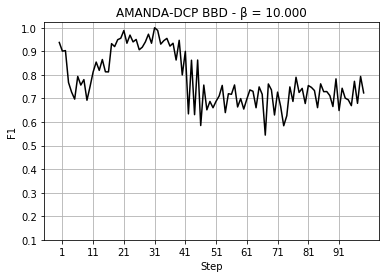

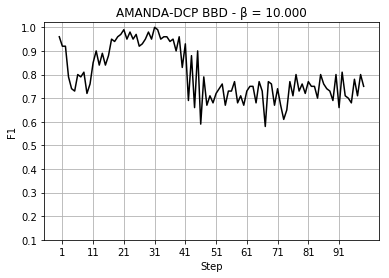

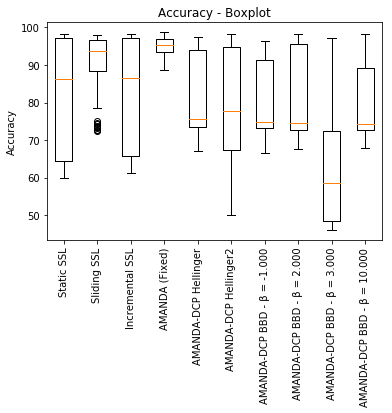

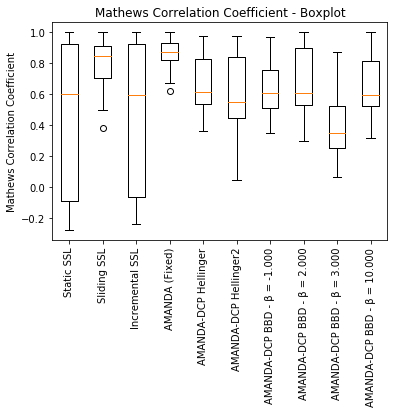

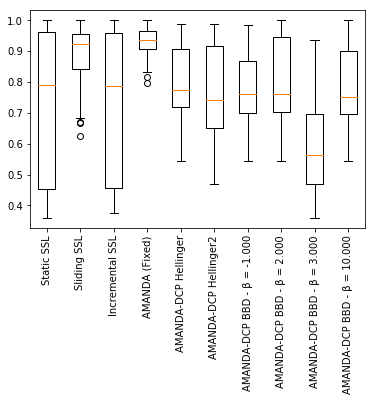

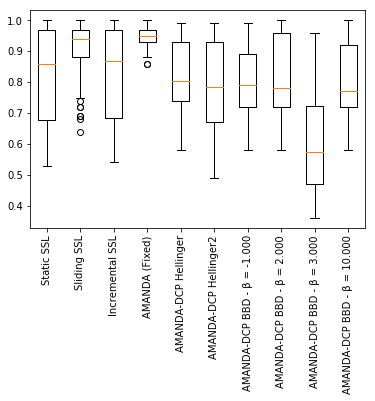

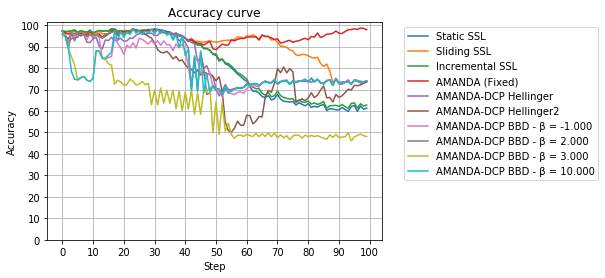

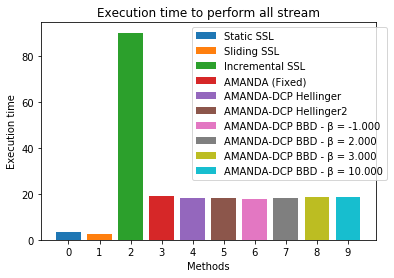

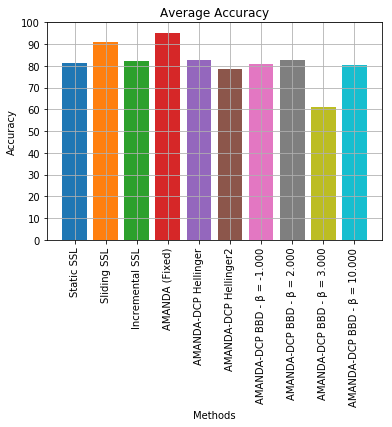

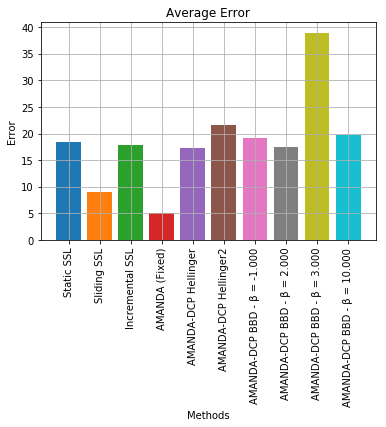

Pos 2 - Error reduction (Sliding SSL):11.651720074215861
Pos 5 - Error reduction (Incremental SSL):0.7687694905568423
Pos 1 - Error reduction (AMANDA (Fixed)):16.45576295068176
Pos 3 - Error reduction (AMANDA-DCP Hellinger):1.4529240587203154
Pos 9 - Error reduction (AMANDA-DCP Hellinger2):-3.8296223353963854
Pos 7 - Error reduction (AMANDA-DCP BBD - β = -1.000):-0.9029270631632
Pos 4 - Error reduction (AMANDA-DCP BBD - β = 2.000):1.1993245521847136
Pos 10 - Error reduction (AMANDA-DCP BBD - β = 3.000):-25.106105886378117
Pos 8 - Error reduction (AMANDA-DCP BBD - β = 10.000):-1.61639027835857


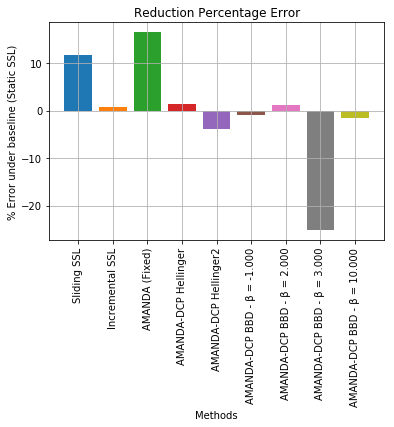

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadFG_2C_2D(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 10, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 10, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 10, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 10, 0.5, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1, 2, 3, 10]
    bestK = [2, 4, 12, 10]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 8, None, "kde", sslClassifier, 'HDDDM')
    
    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 11)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'FG_2C_2D', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()